In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

## 1. Data Loading

In [36]:
from sklearn import datasets

digits = datasets.load_digits()
X = digits.data
y = digits.target

print("Shape of images:", digits.images.shape)   
print("Shape of data:", digits.data.shape)       
print("Target classes:", np.unique(digits.target))  
print("Total samples:", len(digits.data))

Shape of images: (1797, 8, 8)
Shape of data: (1797, 64)
Target classes: [0 1 2 3 4 5 6 7 8 9]
Total samples: 1797


## 2. Data Visualization

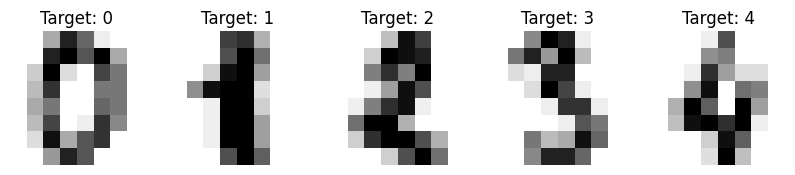

In [37]:
fig, axes = plt.subplots(1, 5, figsize=(10, 3))
for ax, image, label in zip(axes, digits.images[:5], digits.target[:5]):
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title(f'Target: {label}')
    ax.axis('off')

plt.show()

## 3. Preprocessing

In [38]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## 4. Model Building

In [40]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda = LDA()
X_lda = lda.fit_transform(X_scaled, y)
X_lda.shape
explained_variance = lda.explained_variance_ratio_

print("Shape after LDA:", X_lda.shape)
print("Explained variance ratio:", explained_variance)

Shape after LDA: (1797, 9)
Explained variance ratio: [0.28912041 0.18262788 0.16962345 0.1167055  0.08301253 0.06565685
 0.04310127 0.0293257  0.0208264 ]


## 5. Variance Visualization

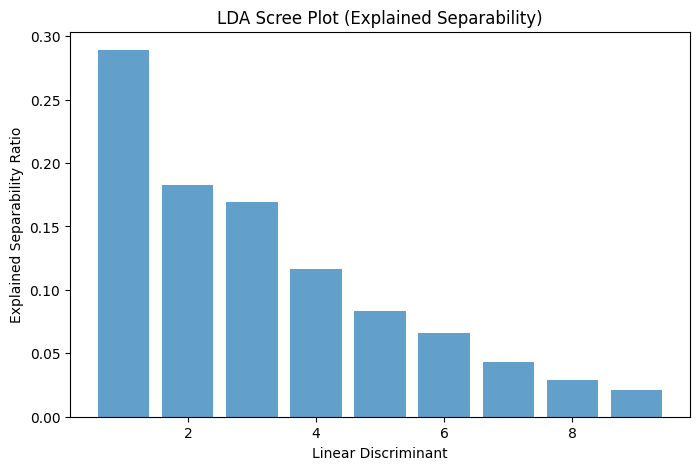

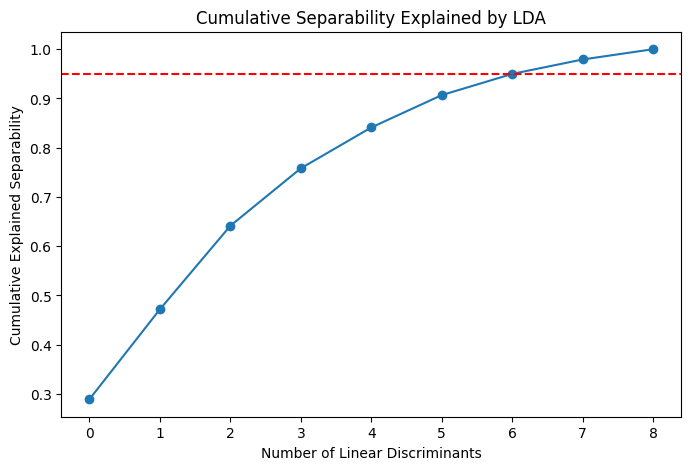

In [41]:
import numpy as np
import matplotlib.pyplot as plt
import os

os.makedirs('../outputs/results', exist_ok=True)
os.makedirs('../outputs/models', exist_ok=True)

# Scree plot
plt.figure(figsize=(8,5))
plt.bar(range(1, len(explained_variance)+1), explained_variance, alpha=0.7, align='center')
plt.xlabel('Linear Discriminant')
plt.ylabel('Explained Separability Ratio')
plt.title('LDA Scree Plot (Explained Separability)')
plt.savefig('../outputs/results/lda_scree_plot.png')
plt.show()


# Cumulative variance
plt.figure(figsize=(8,5))
plt.plot(np.cumsum(explained_variance), marker='o')
plt.xlabel('Number of Linear Discriminants')
plt.ylabel('Cumulative Explained Separability')
plt.title('Cumulative Separability Explained by LDA')
plt.axhline(y=0.95, color='r', linestyle='--')  # 95% threshold line
plt.savefig('../outputs/results/lda_cumsum.png')
plt.show()

## 6. 2D and 3D Visualization

Variance explained by first 2 PCs = 0.472



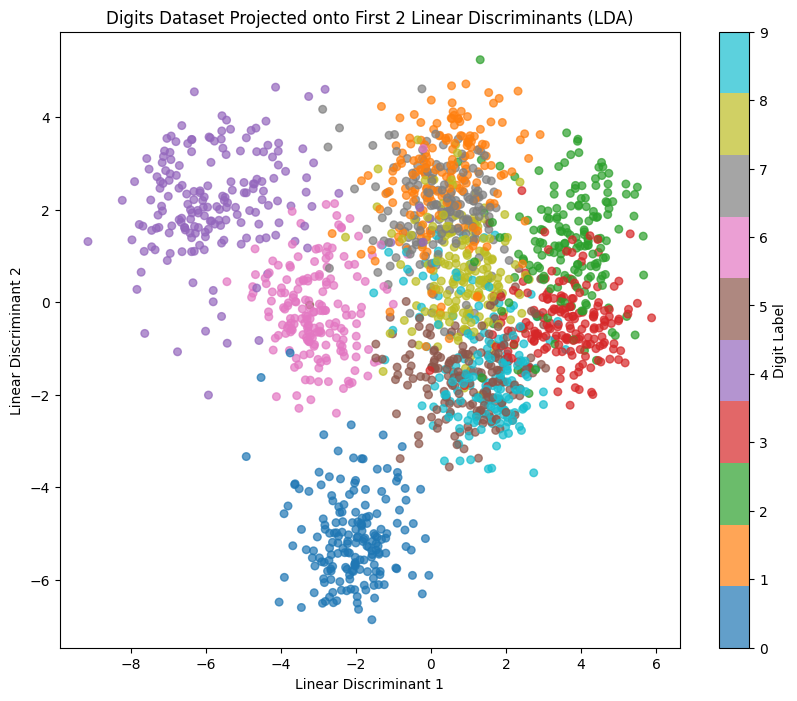

In [42]:
explained_variance_2 = explained_variance[0:2]
variance = explained_variance_2.sum()
print(f"Variance explained by first 2 PCs = {variance:.3f}\n")

plt.figure(figsize=(10,8))
scatter = plt.scatter(X_lda[:,0], X_lda[:,1], 
                      c=y, cmap=plt.cm.get_cmap("tab10", 10), alpha=0.7, s=30)
plt.xlabel("Linear Discriminant 1")
plt.ylabel("Linear Discriminant 2")
plt.title("Digits Dataset Projected onto First 2 Linear Discriminants (LDA)")
plt.colorbar(scatter, label="Digit Label")
plt.savefig('../outputs/results/lda_2_components.png')
plt.show()

Variance explained by first 3 PCs = 0.641



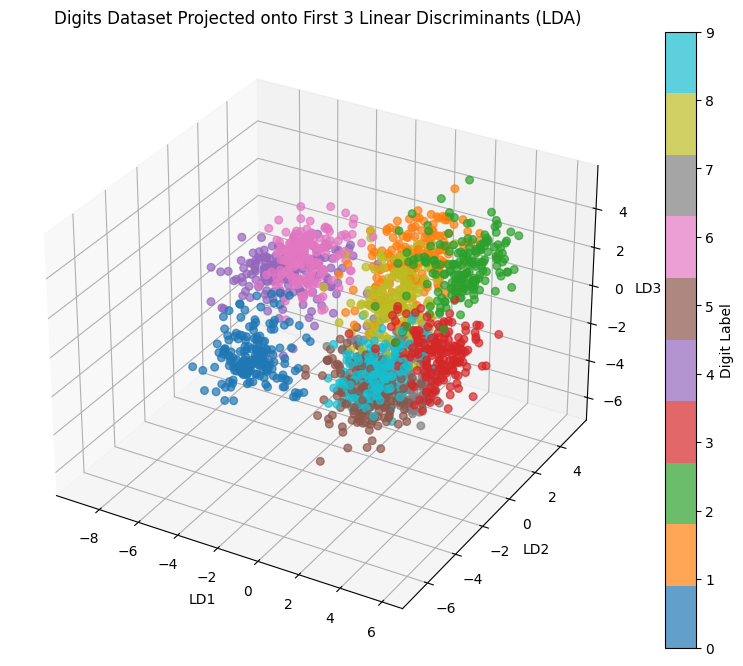

In [43]:
from mpl_toolkits.mplot3d import Axes3D

explained_variance_3 = explained_variance[0:3]
variance = explained_variance_3.sum()
print(f"Variance explained by first 3 PCs = {variance:.3f}\n")

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X_lda[:,0], X_lda[:,1], X_lda[:,2], 
                     c=y, cmap=plt.cm.get_cmap("tab10", 10), alpha=0.7, s=30)

ax.set_xlabel("LD1")
ax.set_ylabel("LD2")
ax.set_zlabel("LD3")
plt.title("Digits Dataset Projected onto First 3 Linear Discriminants (LDA)")
plt.colorbar(scatter, label="Digit Label")
plt.savefig('../outputs/results/lda_3_components.png')
plt.show()

## 7. Classification Using LDA

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

lda_clf = LDA()
lda_clf.fit(X_train, y_train)
y_pred = lda_clf.predict(X_test)

print("Classification Accuracy with LDA:", accuracy_score(y_test, y_pred))

Classification Accuracy with LDA: 0.9481481481481482


## 8. Load and Save Model

In [46]:
import joblib

joblib.dump(lda, '../outputs/models/lda.pkl')
print("Model Saved Successfully")

model = joblib.load('../outputs/models/lda.pkl')

Model Saved Successfully
